In [46]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
from math import *
%matplotlib inline

In [22]:
#создаем случайную переменную с бета-распределением
rbeta = sts.beta(1, 3)

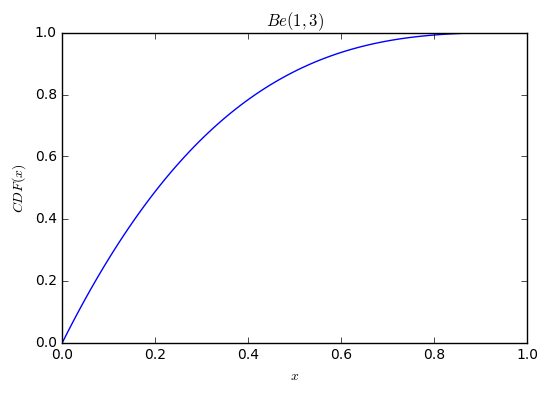

In [26]:
#посмотрим на его функцию распределения
x = np.linspace(0, 1, 100)
cdf = rbeta.cdf(x)
pdf = rbeta.pdf(x)
plt.plot(x, cdf)
plt.title("$Be(1, 3)$")
plt.xlabel("$x$")
plt.ylabel("$CDF(x)$")

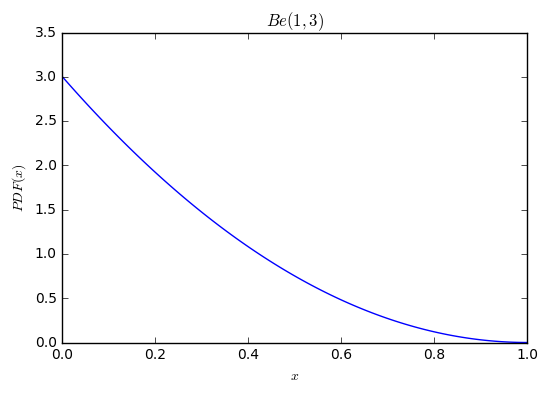

In [27]:
#построим график плотности вероятности
plt.plot(x, pdf)
plt.title("$Be(1, 3)$")
plt.xlabel("$x$")
plt.ylabel("$PDF(x)$")

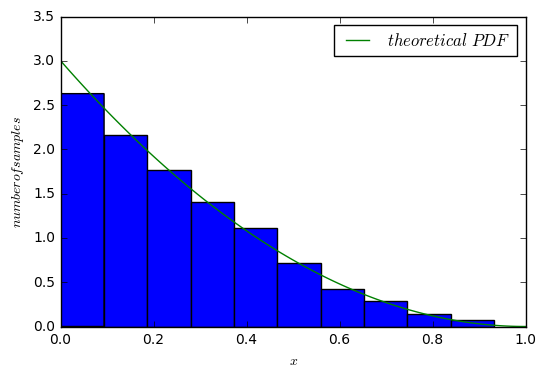

In [40]:
seed = 32
#генерируем выборку размером 1000
sample = rbeta.rvs(1000, random_state=seed)

#построим гистограмму выборки и теоретическую плотность распределения
plt.hist(sample, normed = True)
plt.plot(x, pdf, label = "$theoretical\ PDF$")
plt.xlabel("$x$")
plt.ylabel("$number of samples$")
plt.legend()

In [47]:
#определим функции для расчета теоретического среднего и дисперсии бета-распределения
def theor_mean(a, b):
    return float(a)/(a+b)
def theor_var(a, b):
    return float(a*b)/(pow(a+b,2)*(a+b+1))

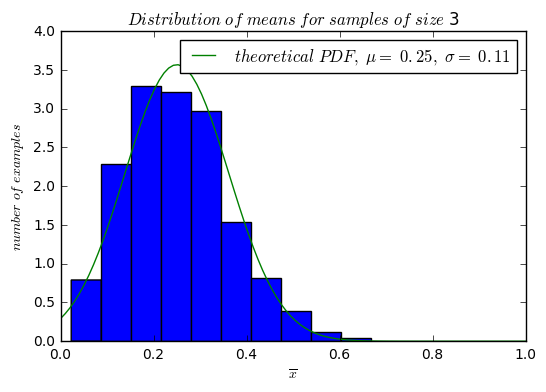

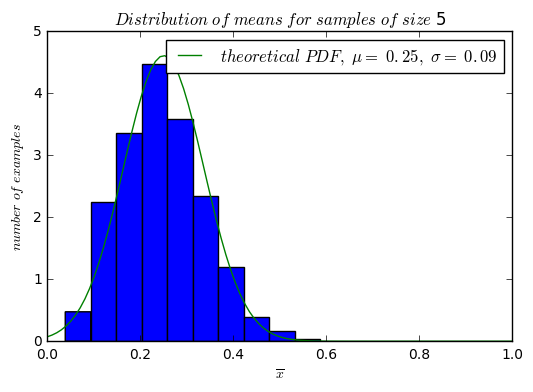

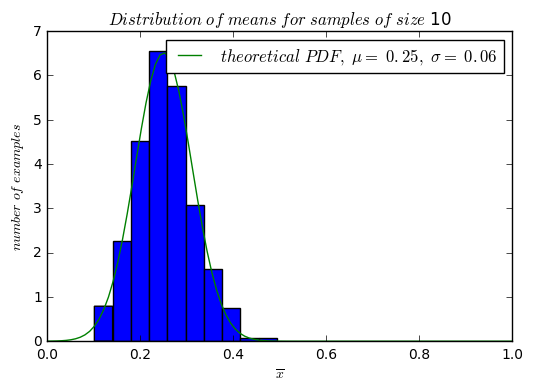

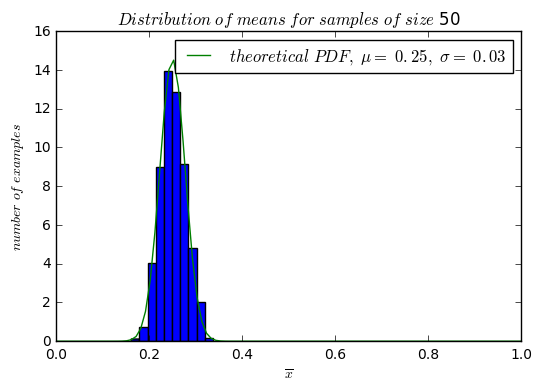

In [72]:
#для разных размеров выборок сформируем по 1000 выборок, 
#построим гистограмму средних и график плотности нормального распределения
#с параметрами, вычисленными на основе ЦПТ
for n in [3, 5, 10, 50]:
    avgs = []
    for i in range(1000):
        sample = rbeta.rvs(n)
        avgs.append(sample.mean())
    plt.figure()
    plt.hist(avgs, normed = True)
    mean = theor_mean(1, 3)
    sigma = pow(theor_var(1, 3)/n, 0.5)
    bnorm = sts.norm(loc = mean, scale = sigma)
    plt.plot(x, bnorm.pdf(x), label = "$theoretical\ PDF,\ \mu=\ %5.2f,\ \sigma=\ %5.2f$" % (mean, sigma))
    plt.xlabel("$\overline{x}$")
    plt.ylabel("$number\ of\ examples$")
    plt.legend()
    plt.title("$Distribution\ of\ means\ for\ samples\ of\ size\ $"+str(n))

Вывод: По графикам видно, что нормальное распределение достаточно точно аппроксимирует распределение средних даже при малом размере выборок. Однако, при росте размера выборок, точность аппроксимации растет, как и предсказано центральной предельной теоремой. Также видно, что с ростом n дисперсия распределения уменьшается.